In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd
import random

## Univariate Data

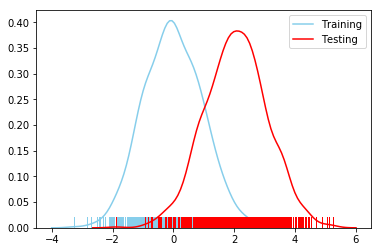

In [2]:
mu1 = 0 # mean 
sigma1 =  1 # standard deviation
# below u want 1000 data size
s1 = np.random.normal(mu1, sigma1, 1000)

mu2 = 2 # mean 
sigma2 =  1 # standard deviation
s2 = np.random.normal(mu2, sigma2, 1000)

# PLOT
# Method 1: on the same Axis
sns.distplot(s1 , color="skyblue", label="Training", hist=False, rug=True)
sns.distplot(s2 , color="red", label="Testing",hist=False, rug=True)
plt.legend();
plt.show()

#### Univariate with two class in Training and Testing Distrbutions

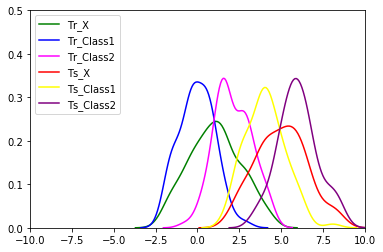

In [3]:
## Training
Tr_mu1 = 0 # mean 
Tr_sigma1 =  1 # standard deviation
Tr_s1 = np.random.normal(Tr_mu1, Tr_sigma1, 100)

Tr_mu2 = 2 # mean 
Tr_sigma2 =  1 # standard deviation
Tr_s2 = np.random.normal(Tr_mu2, Tr_sigma2, 100)

Tr_X=np.append(Tr_s1,Tr_s2)

## Testing
Ts_mu1 = 4 # mean 
Ts_sigma1 =  1 # standard deviation
Ts_s1 = np.random.normal(Ts_mu1, Ts_sigma1, 100)

Ts_mu2 = 6 # mean 
Ts_sigma2 =  1 # standard deviation
Ts_s2 = np.random.normal(Ts_mu2, Ts_sigma2, 100)

Ts_X=np.append(Ts_s1,Ts_s2)

# PLOT
# Training
sns.distplot(Tr_X , color="green", label="Tr_X", hist=False)
sns.distplot(Tr_s1 , color="blue", label="Tr_Class1", hist=False)
sns.distplot(Tr_s2 , color="magenta", label="Tr_Class2",hist=False)

# Training
sns.distplot(Ts_X , color="red", label="Ts_X", hist=False)
sns.distplot(Ts_s1 , color="yellow", label="Ts_Class1", hist=False)
sns.distplot(Ts_s2 , color="purple", label="Ts_Class2",hist=False)

plt.ylim(0,0.50)
plt.xlim(-10, 10)
plt.legend();
plt.show()


####  Multivariate data with two classss in Training and Testing Distrbutions

In [4]:
# *kwargs allows you to handle named arguments that you have not defined in advance
def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """
    # Find and sort eigenvalues and eigenvectors into descending order
    # Return the eigenvalues and eigenvectors of a matrix
    eigvals, eigvecs = np.linalg.eigh(cov)
    #Returns the indices that would sort an array.
    # sort just arranges by value
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

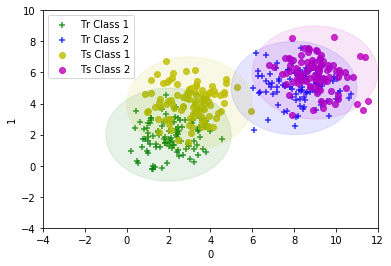

In [5]:
## Training
Tr_Mu1 = [2,2]
# returns 2x2 identity matrix
Tr_Cov1 = np.eye(2)
# The multivariate normal, multinormal or Gaussian distribution is a 
# generalization of the one-dimensional normal distribution to higher dimensions
Tr_d1 = np.random.multivariate_normal(Tr_Mu1, Tr_Cov1, 100)

Tr_Mu2 = [8,5]
Tr_Cov2 = np.eye(2)
Tr_d2 = np.random.multivariate_normal(Tr_Mu2, Tr_Cov2, 100)

Tr_X_array=np.concatenate((Tr_d1,Tr_d2), axis=0)
Tr_X=pd.DataFrame(Tr_X_array)


## Testing
Ts_Mu1 = [3,4]
Ts_Cov1 = np.eye(2)
Ts_d1 = np.random.multivariate_normal(Ts_Mu1, Ts_Cov1, 100)

Ts_Mu2 = [9,6]
Ts_Cov2 = np.eye(2)
Ts_d2 = np.random.multivariate_normal(Ts_Mu2, Ts_Cov2, 100)

Ts_X_array=np.concatenate((Ts_d1,Ts_d2), axis=0)
Ts_X=pd.DataFrame(Ts_X_array)

# use the function regplot to make a scatterplot
ax1=sns.regplot(x=Tr_X.iloc[0:100,0], y=Tr_X.iloc[0:100,1], marker="+", fit_reg=False, color="g", label="Tr Class 1")
e1 = get_cov_ellipse(Tr_Cov1, Tr_Mu1, 3,color="g", alpha=0.1)
ax1.add_artist(e1)

ax2=sns.regplot(x=Tr_X.iloc[101:200,0], y=Tr_X.iloc[101:200,1],  marker="+", fit_reg=False, color="b", label="Tr Class 2")
e2 = get_cov_ellipse(Tr_Cov2, Tr_Mu2, 3, color="b", alpha=0.1)
ax2.add_artist(e2)

# use the function regplot to make a scatterplot
ax3=sns.regplot(x=Ts_X.iloc[0:100,0], y=Ts_X.iloc[0:100,1],fit_reg=False, color="y", marker="o", label="Ts Class 1")
e3 = get_cov_ellipse(Ts_Cov1, Ts_Mu1, 3, color="y", alpha=0.1)
ax3.add_artist(e3)

ax4=sns.regplot(x=Ts_X.iloc[101:200,0], y=Ts_X.iloc[101:200,1],fit_reg=False, color="m", marker="o", label="Ts Class 2")
e4 = get_cov_ellipse(Ts_Cov2, Ts_Mu2, 3,color="m", alpha=0.1)
ax4.add_artist(e4)

plt.ylim(-4,10)
plt.xlim(-4, 12)
plt.legend()
plt.show()


## One class covariate shift

### One class covariate shift (D1): The dataset is consisting of 1000 data-points, the non-stationary shift occurs in the middle of the data stream at 501 data-point, by shifting the mean of second class from $\mathcal{N}(x: 2.5, 2)$ to $\mathcal{N}(x: 6.5, 2)$, where $\mathcal{N}(x: \mu, \sigma)$ denotes the normal distribution with mean and standard deviation respectively. 

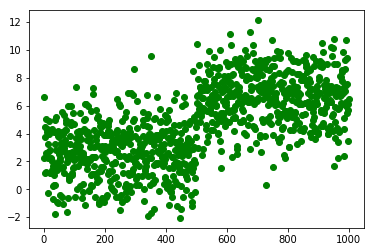

In [6]:
## Training
Tr_Mu1 = 2.5
Tr_std1= 2
Tr_d1 = np.random.normal(Tr_Mu1, Tr_std1, 500)

Tr_Mu2 = 6.5
Tr_std2= 2
Tr_d2 = np.random.normal(Tr_Mu2, Tr_std2, 500)

Tr_X_array=np.concatenate((Tr_d1,Tr_d2), axis=0)
Tr_X=pd.DataFrame(Tr_X_array)
no_of_pnts=np.arange(1, 1001, dtype=np.float)


# PLOT
plt.scatter(no_of_pnts,Tr_X, color='g')
plt.legend()
plt.show()



### Create a toy dataset set with two classes (e.g. $1$ and $2$). Choose the number of observations by yoursleves (e.g. $n=200$) and fix the number of columns to 1. The mean of class 1 and class 2 changed/shifted at the middle of the data stream (i.e. after generating $100^{th}$) observation. 


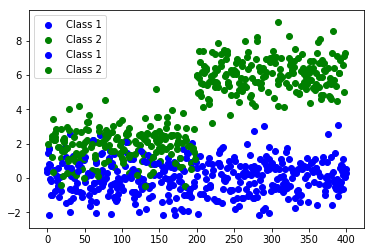

In [8]:
#================================================
## Data Before Shift
#================================================

Tr_Mu1 = 0 # mean of class 1
Tr_std1= 1 # standard deviation of class 1
Tr_d1 = np.random.normal(Tr_Mu1, Tr_std1, 100) # Generate data (covariates or input) for class 1
Tr_lbl_c1=np.ones(100) # Generate Labels for class 1

Tr_Mu2 = 2 # mean of class 2
Tr_std2= 1 # standard deviation of class 2
Tr_d2 = np.random.normal(Tr_Mu2, Tr_std2, 100) # Generate data (covariates or input) for class 2
Tr_lbl_c2=np.ones(100)+1 # Generate Labels for class 2

Tr_X_array=np.concatenate((Tr_d1,Tr_d2), axis=0) # concatenate covariates of class 1 and class 2
Tr_Y_array=np.concatenate((Tr_lbl_c1,Tr_lbl_c2), axis=0) # concatenate labels of class 1 and class 2

Tr_indx=np.random.permutation(len(Tr_X_array)) # generate the indexes with permutation, so class 1 and class 2 data get mixed

tr_Y=[];
for x in range(0, 200):  # for loop to assign labels based on mixed indexes
    if Tr_indx[x] <= 99:
        t = 1
        tr_Y.append(t)
    else:
        t = 2
        tr_Y.append(t)      
  
Tr_X_rand=Tr_X_array[Tr_indx] # create an array that contains randomised data with mixture of class 1 and class 2 based on indexes
df_rand=pd.DataFrame({"x": Tr_X_rand, "y": tr_Y}) # put them inside a data frame

#================================================
## Data After Shift
#================================================

Ts_Mu1 = 0 # mean of class 1
Ts_std1= 1 # standard deviation of class 1
Ts_d1 = np.random.normal(Ts_Mu1, Ts_std1, 100) # Generate data (covariates or input) for class 1
Ts_lbl_c1=np.ones(100) # Generate Labels for class 1

Ts_Mu2 = 6 # mean of class 2
Ts_std2= 1 # standard deviation of class 2
Ts_d2 = np.random.normal(Ts_Mu2, Ts_std2, 100) # Generate data (covariates or input) for class 2
Ts_lbl_c2=np.ones(100)+1 # Generate Labels for class 2

Ts_X_array=np.concatenate((Ts_d1,Ts_d2), axis=0) # concatenate covariates of class 1 and class 2
Ts_Y_array=np.concatenate((Ts_lbl_c1,Ts_lbl_c2), axis=0) # concatenate labels of class 1 and class 2

Ts_indx=np.random.permutation(len(Ts_X_array)) # generate the indexes with permutation, so class 1 and class 2 data get mixed

ts_Y=[];
for x in range(0, 200):  # for loop to assign labels based on mixed indexes
    if Ts_indx[x] <= 99:
        t = 1
        ts_Y.append(t)
    else:
        t = 2
        ts_Y.append(t)      
  
Ts_X_rand=Ts_X_array[Ts_indx] # create an array that contains randomised data with mixture of class 1 and class 2 based on indexes
Ts_df_rand=pd.DataFrame({"x": Ts_X_rand, "y": ts_Y}) # put them inside a data frame


## Merge Two Data frame before and after shift
Data_all=[df_rand,Ts_df_rand]
df_main=pd.concat(Data_all, ignore_index=True)

df_main["indxx"]=df_main.index # create an additional column for index, which can be used for plotting a figure
df_Class1=df_main[df_main.y==1] # create a dataframe which has class 1 inputs and labels
df_Class2=df_main[df_main.y==2] # create a dataframe which has class 2 inputs and labels

# plot
plt.scatter(df_Class1.indxx, df_Class1.x, label="Class 1", color='b') # plot class 1 data
plt.scatter(df_Class2.indxx, df_Class2.x, label="Class 2", color='g') # plot class 2 data
plt.legend()
plt.show()
